In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
!wandb login 9676e3cc95066e4865586082971f2653245f09b4

Appending key for api.wandb.ai to your netrc file: /Users/guydavidson/.netrc
Successfully logged in to Weights & Biases!


In [3]:
import numpy as np
import pandas as pd
import scipy
from scipy import stats
from scipy.special import factorial

from mpl_toolkits.mplot3d import Axes3D
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import patches
from matplotlib import path as mpath

import pickle
import tabulate
import wandb
from collections import namedtuple

import meta_learning_data_analysis as analysis
import meta_learning_analysis_plots as plots

In [4]:
np.set_printoptions(linewidth=160)
# Avoid escaping any latex characters
tabulate.LATEX_ESCAPE_RULES = {}

MIN_FONT_SIZE = 14
LABELS_FONT_SIZE = 20
TITLE_FONT_SIZE = 24

matplotlib.rcParams.update({'font.size': MIN_FONT_SIZE})
FONT_DICT = dict(fontsize=LABELS_FONT_SIZE) 
TITLE_FONT_DICT = dict(fontsize=TITLE_FONT_SIZE)

PER_PLOT_WIDTH = 6

QUERY_ORDINAL_POSITION_COMORLAP= 'cool'
NUM_TIMES_TRAINED_COLORMAP = 'copper'

In [5]:
cache = analysis.refresh_cache()
print(cache.keys())

six_replications_analyses = cache['six_replications_analyses']
# query_mod_replications = cache['query_mod_replications']
control_analyses = cache['control_analyses']
six_replications_updated_analyses = cache['six_replications_updated_analyses']
control_updated_analyses = cache['updated_control_analyses']
query_mod_updated_analyses = cache['query_mod_updated_analyses']

dict_keys(['six_replications_analyses', 'control_analyses', 'query_mod_replications', 'six_replications_updated_analyses', 'updated_control_analyses', 'query_mod_updated_analyses', 'forgetting_curves_raw_data'])


# Combined Figure

Figure:

\begin{figure}[!htb]
% \vspace{-0.225in}
\centering
\includegraphics[width=\linewidth]{ch-results/figures/workshop/combined_figure.pdf}
\caption{ {\bf FIGURE TITLE.} FIGURE DESCRIPTION.}
\label{fig:results-workshop-combined-figure}
% \vspace{-0.2in}
\end{figure}


 Wrapfigure:

\begin{wrapfigure}{r}{0.5\linewidth}
\vspace{-.3in}
\begin{spacing}{1.0}
\centering
\includegraphics[width=0.95\linewidth]{ch-results/figures/workshop/combined_figure.pdf}
\caption{ {\bf FIGURE TITLE.} FIGURE DESCRIPTION.}
\label{fig:results-workshop-combined-figure}
\end{spacing}
% \vspace{-.25in}
\end{wrapfigure}



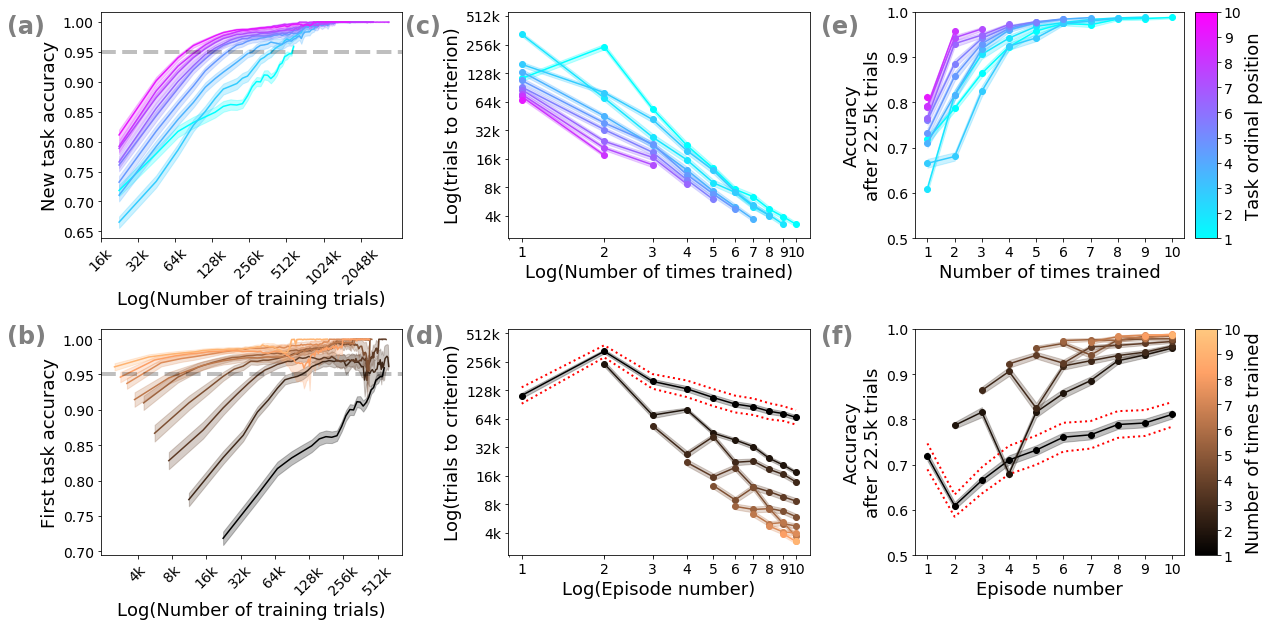

In [6]:
NROWS = 2
NCOLS = 3
COL_WIDTH = 6
ROW_HEIGHT = 5 
WIDTH_SPACING = 2
HEIGHT_SPACING = 0

title_font_dict = TITLE_FONT_DICT.copy()
title_font_dict['pad'] = 10

multi_plot_font_dict = FONT_DICT.copy()
multi_plot_font_dict['fontsize'] = 18
    
figure = plt.figure(figsize=(NCOLS * COL_WIDTH + WIDTH_SPACING, NROWS * ROW_HEIGHT + HEIGHT_SPACING))
plt.subplots_adjust(hspace=0.4, wspace=0.35)


raw_accuracy_axes = (plt.subplot(NROWS, NCOLS, 1), plt.subplot(NROWS, NCOLS, NCOLS + 1))
plots.both_raw_accuracy_plots(six_replications_analyses, '',
                              shade_error=True, font_dict=multi_plot_font_dict, log_x=True,
                              new_task_colormap=QUERY_ORDINAL_POSITION_COMORLAP, 
                              first_task_colormap=NUM_TIMES_TRAINED_COLORMAP, title_font_dict=title_font_dict,
                              hline_y=0.95, first_task_title='', new_task_title='', add_colorbars=False,
                              external_axes=raw_accuracy_axes)


examples_to_criterion_axes = (plt.subplot(NROWS, NCOLS, 2), plt.subplot(NROWS, NCOLS, NCOLS + 2))
LOG_PLOT_YLIM = (7.75, 13.25)
plots.plot_processed_results_all_dimensions(six_replications_analyses, data_index=1, 
                                            title='',
                                            ylim=LOG_PLOT_YLIM, log_x=True, log_y=True, sem_n=(60, 60, 60, 180), shade_error=True,
                                            font_dict=multi_plot_font_dict, times_trained_colormap=QUERY_ORDINAL_POSITION_COMORLAP, 
                                            tasks_trained_colormap=NUM_TIMES_TRAINED_COLORMAP,
                                            dimension_names=('',), dimension_indices=(3,),
                                            num_tasks_trained_highlight_first_time='highlight', add_colorbars=False,
                                            title_font_dict=TITLE_FONT_DICT, external_axes=examples_to_criterion_axes)


accuracy_22point5k_axes = (plt.subplot(NROWS, NCOLS, 3), plt.subplot(NROWS, NCOLS, NCOLS + 3))
ACCURACY_PLOT_YLIM = (0.5, 1.0)
plots.plot_processed_results_all_dimensions(six_replications_updated_analyses, data_index=3, 
                                            title='', #'New episode, 22.5k accuracy, baseline model',
                                            sem_n=(60, 60, 60, 180), shade_error=True, ylim=ACCURACY_PLOT_YLIM, plot_y_label='Accuracy\nafter 22.5k trials',
                                            font_dict=multi_plot_font_dict, times_trained_colormap=QUERY_ORDINAL_POSITION_COMORLAP, 
                                            tasks_trained_colormap=NUM_TIMES_TRAINED_COLORMAP,
                                            dimension_names=('',), dimension_indices=(3,),
                                            num_tasks_trained_highlight_first_time='highlight',
                                            title_font_dict=TITLE_FONT_DICT, external_axes=accuracy_22point5k_axes)

TEXT_POSITIONS = [(0.06, 0.85), (0.06, 0.42),
                  (0.3365, 0.85), (0.3365, 0.42),
                  (0.625, 0.85), (0.625, 0.42)]

subfigure_text_font_dict = FONT_DICT.copy()
subfigure_text_font_dict['fontsize'] += 4
subfigure_text_font_dict['color'] = '#808080'
subfigure_text_font_dict['weight'] = 'bold'

num_subfigures = 6
for i in range(num_subfigures):
    pos = TEXT_POSITIONS[i]
    plt.text(pos[0], pos[1], f'({chr(97 + i)})', 
             subfigure_text_font_dict, transform=figure.transFigure)


plots.save('workshop/combined_figure.pdf')
plt.show()

# Unprocssed accuracy plots


Figure:

\begin{figure}[!htb]
% \vspace{-0.225in}
\centering
\includegraphics[width=\linewidth]{ch-results/figures/workshop/unprocessed_accuracy.pdf}
\caption{ {\bf FIGURE TITLE.} FIGURE DESCRIPTION.}
\label{fig:results-workshop-unprocessed-accuracy}
% \vspace{-0.2in}
\end{figure}


 Wrapfigure:

\begin{wrapfigure}{r}{0.5\linewidth}
\vspace{-.3in}
\begin{spacing}{1.0}
\centering
\includegraphics[width=0.95\linewidth]{ch-results/figures/workshop/unprocessed_accuracy.pdf}
\caption{ {\bf FIGURE TITLE.} FIGURE DESCRIPTION.}
\label{fig:results-workshop-unprocessed-accuracy}
\end{spacing}
% \vspace{-.25in}
\end{wrapfigure}



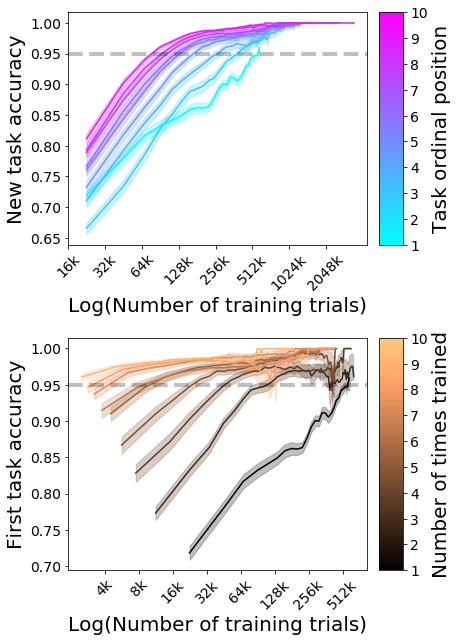

In [23]:
title_font_dict = TITLE_FONT_DICT.copy()
title_font_dict['pad'] = 10

plots.both_raw_accuracy_plots(six_replications_analyses, '',
                              shade_error=True, font_dict=FONT_DICT, log_x=True,
                              new_task_colormap=QUERY_ORDINAL_POSITION_COMORLAP, 
                              first_task_colormap=NUM_TIMES_TRAINED_COLORMAP, title_font_dict=title_font_dict,
                              hline_y=0.95, first_task_title='', new_task_title='',
                              save_path='workshop/unprocessed_accuracy.pdf')

# Examples to criterion, combined only

Figure:

\begin{figure}[!htb]
% \vspace{-0.225in}
\centering
\includegraphics[width=\linewidth]{ch-results/figures/workshop/examples_to_criterion.pdf}
\caption{ {\bf FIGURE TITLE.} FIGURE DESCRIPTION.}
\label{fig:results-workshop-examples-to-criterion}
% \vspace{-0.2in}
\end{figure}


 Wrapfigure:

\begin{wrapfigure}{r}{0.5\linewidth}
\vspace{-.3in}
\begin{spacing}{1.0}
\centering
\includegraphics[width=0.95\linewidth]{ch-results/figures/workshop/examples_to_criterion.pdf}
\caption{ {\bf FIGURE TITLE.} FIGURE DESCRIPTION.}
\label{fig:results-workshop-examples-to-criterion}
\end{spacing}
% \vspace{-.25in}
\end{wrapfigure}



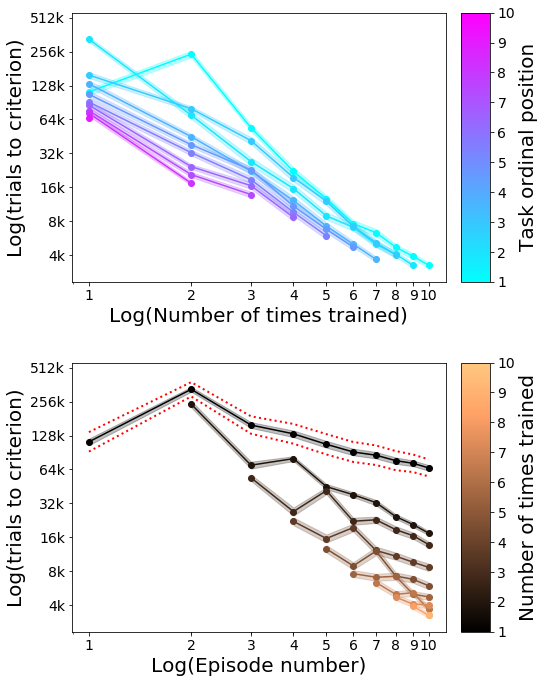

In [54]:
LOG_PLOT_YLIM = (7.75, 13.25)

plots.plot_processed_results_all_dimensions(six_replications_analyses, data_index=1, 
                                            title='',
                                            ylim=LOG_PLOT_YLIM, log_x=True, log_y=True, sem_n=(60, 60, 60, 180), shade_error=True,
                                            font_dict=FONT_DICT, times_trained_colormap=QUERY_ORDINAL_POSITION_COMORLAP, 
                                            tasks_trained_colormap=NUM_TIMES_TRAINED_COLORMAP,
                                            dimension_names=('',), dimension_indices=(3,),
                                            num_tasks_trained_highlight_first_time='highlight',
                                            title_font_dict=TITLE_FONT_DICT, save_path='workshop/examples_to_criterion.pdf')

# 22.5k trial accuracy, combined only

Figure:

\begin{figure}[!htb]
% \vspace{-0.225in}
\centering
\includegraphics[width=\linewidth]{ch-results/figures/workshop/22point5k_examples_accuracy.pdf}
\caption{ {\bf FIGURE TITLE.} FIGURE DESCRIPTION.}
\label{fig:results-workshop-22point5k-examples-accuracy}
% \vspace{-0.2in}
\end{figure}


 Wrapfigure:

\begin{wrapfigure}{r}{0.5\linewidth}
\vspace{-.3in}
\begin{spacing}{1.0}
\centering
\includegraphics[width=0.95\linewidth]{ch-results/figures/workshop/22point5k_examples_accuracy.pdf}
\caption{ {\bf FIGURE TITLE.} FIGURE DESCRIPTION.}
\label{fig:results-workshop-22point5k-examples-accuracy}
\end{spacing}
% \vspace{-.25in}
\end{wrapfigure}



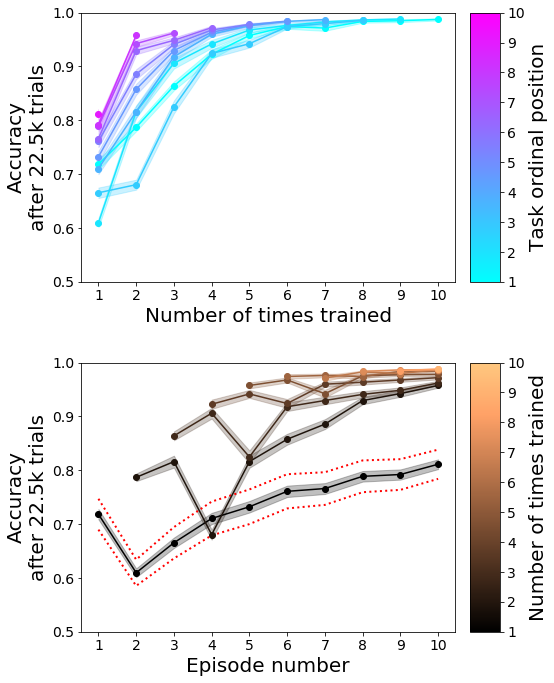

In [9]:
ACCURACY_PLOT_YLIM = (0.5, 1.0)

plots.plot_processed_results_all_dimensions(six_replications_updated_analyses, data_index=3,
                                            title='', #'New episode, 22.5k accuracy, baseline model',
                                            sem_n=(60, 60, 60, 180), shade_error=True, ylim=ACCURACY_PLOT_YLIM, plot_y_label='Accuracy\nafter 22.5k trials',
                                            font_dict=FONT_DICT, times_trained_colormap=QUERY_ORDINAL_POSITION_COMORLAP, 
                                            tasks_trained_colormap=NUM_TIMES_TRAINED_COLORMAP,
                                            dimension_names=('',), dimension_indices=(3,),
                                            num_tasks_trained_highlight_first_time='highlight',
                                            title_font_dict=TITLE_FONT_DICT, save_path='workshop/22point5k_examples_accuracy.pdf')

------

# Appendix -- results by dimension

## Trials to criterion

Figure:

\begin{figure}[!htb]
% \vspace{-0.225in}
\centering
\includegraphics[width=\linewidth]{ch-results/figures/workshop/appendix_results_by_dimension.pdf}
\caption{ {\bf FIGURE TITLE.} FIGURE DESCRIPTION.}
\label{fig:results-workshop-appendix-results-by-dimension}
% \vspace{-0.2in}
\end{figure}


 Wrapfigure:

\begin{wrapfigure}{r}{0.5\linewidth}
\vspace{-.3in}
\begin{spacing}{1.0}
\centering
\includegraphics[width=0.95\linewidth]{ch-results/figures/workshop/appendix_results_by_dimension.pdf}
\caption{ {\bf FIGURE TITLE.} FIGURE DESCRIPTION.}
\label{fig:results-workshop-appendix-results-by-dimension}
\end{spacing}
% \vspace{-.25in}
\end{wrapfigure}



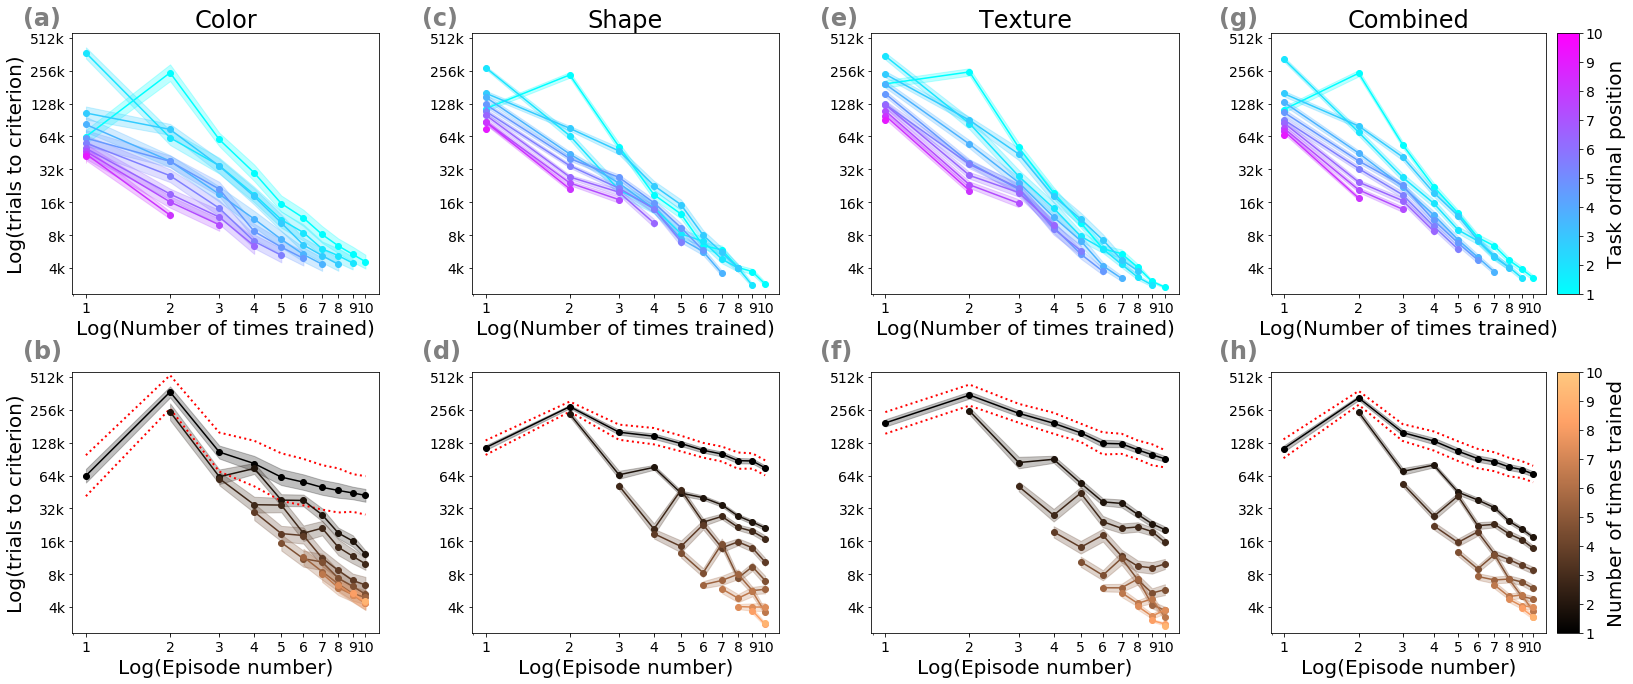

In [10]:
LOG_PLOT_YLIM = (7.75, 13.25)
# from matplotlib.colors import LinearSegmentedColormap
# colors = ['#000000', '#a6dba0', '#008837'] # ['#e9a3c9', '#a1d76a']
# cm = LinearSegmentedColormap.from_list('NumTasksColormap', colors, N=9)

plots.plot_processed_results_all_dimensions(six_replications_updated_analyses, data_index=1, 
                                            title='',
                                            ylim=LOG_PLOT_YLIM, log_x=True, log_y=True, sem_n=(60, 60, 60, 180), shade_error=True,
                                            font_dict=FONT_DICT, times_trained_colormap=QUERY_ORDINAL_POSITION_COMORLAP, 
                                            tasks_trained_colormap=NUM_TIMES_TRAINED_COLORMAP,
                                            num_tasks_trained_highlight_first_time='highlight', add_subfigure_texts=True,
                                            title_font_dict=TITLE_FONT_DICT, save_path='workshop/appendix_results_by_dimension.pdf')

## Accuracy after 22.5k trials

Figure:

\begin{figure}[!htb]
% \vspace{-0.225in}
\centering
\includegraphics[width=\linewidth]{ch-results/figures/workshop/appendix_accuracy_by_dimension.pdf}
\caption{ {\bf FIGURE TITLE.} FIGURE DESCRIPTION.}
\label{fig:results-workshop-appendix-accuracy-by-dimension}
% \vspace{-0.2in}
\end{figure}


 Wrapfigure:

\begin{wrapfigure}{r}{0.5\linewidth}
\vspace{-.3in}
\begin{spacing}{1.0}
\centering
\includegraphics[width=0.95\linewidth]{ch-results/figures/workshop/appendix_accuracy_by_dimension.pdf}
\caption{ {\bf FIGURE TITLE.} FIGURE DESCRIPTION.}
\label{fig:results-workshop-appendix-accuracy-by-dimension}
\end{spacing}
% \vspace{-.25in}
\end{wrapfigure}



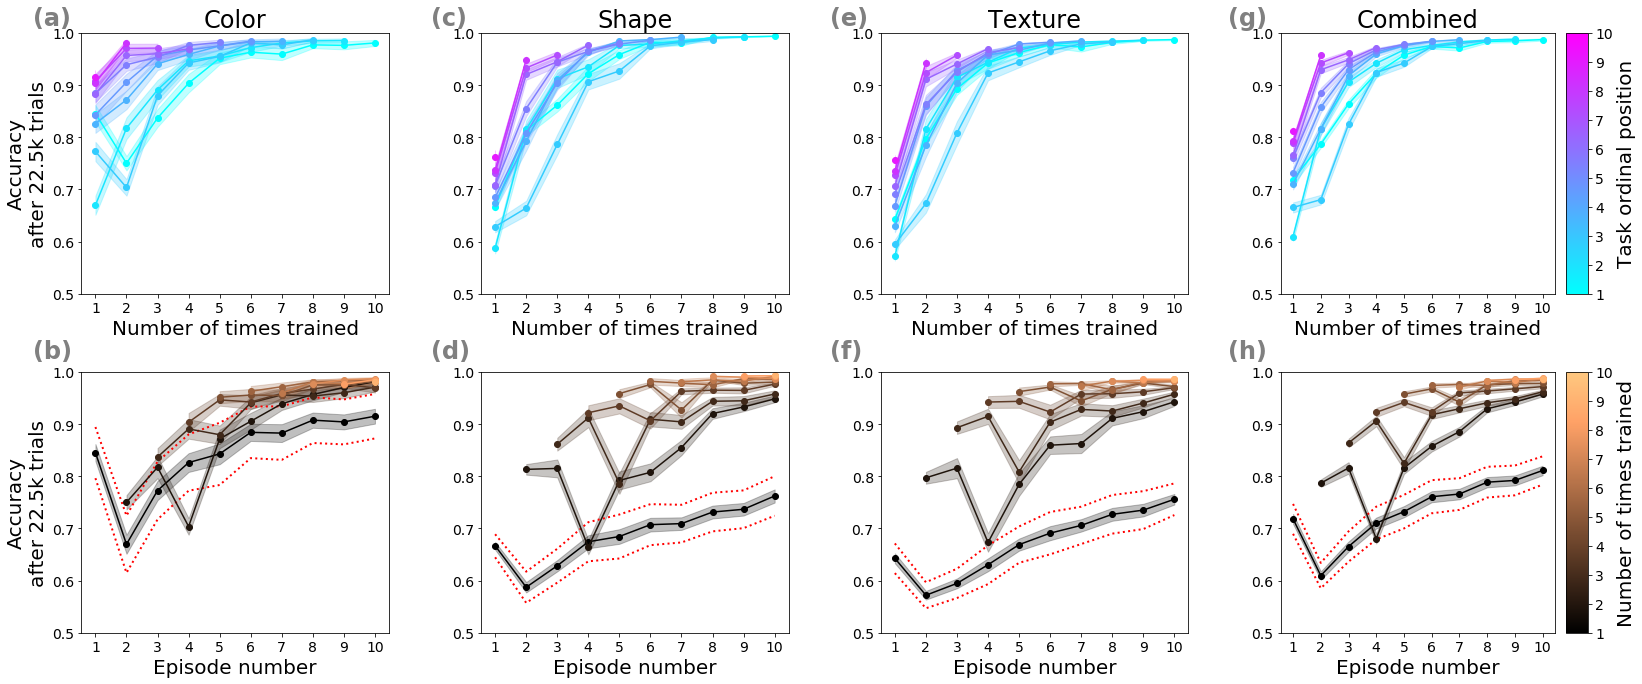

In [11]:
ACCURACY_PLOT_YLIM = (0.5, 1.0)

plots.plot_processed_results_all_dimensions(six_replications_updated_analyses, data_index=3, 
                                            title='', #'New episode, 22.5k accuracy, baseline model',
                                            sem_n=(60, 60, 60, 180), shade_error=True, ylim=ACCURACY_PLOT_YLIM, plot_y_label='Accuracy\nafter 22.5k trials',
                                            font_dict=FONT_DICT, times_trained_colormap=QUERY_ORDINAL_POSITION_COMORLAP, 
                                            tasks_trained_colormap=NUM_TIMES_TRAINED_COLORMAP,
                                            num_tasks_trained_highlight_first_time='highlight', add_subfigure_texts=True,
                                            title_font_dict=TITLE_FONT_DICT, save_path='workshop/appendix_accuracy_by_dimension.pdf')

# Appendix - heterogeneous dimensions control

## Trials to criterion

Figure:

\begin{figure}[!htb]
% \vspace{-0.225in}
\centering
\includegraphics[width=\linewidth]{ch-results/figures/workshop/control_examples_to_criterion.pdf}
\caption{ {\bf FIGURE TITLE.} FIGURE DESCRIPTION.}
\label{fig:results-workshop-control-examples-to-criterion}
% \vspace{-0.2in}
\end{figure}


 Wrapfigure:

\begin{wrapfigure}{r}{0.5\linewidth}
\vspace{-.3in}
\begin{spacing}{1.0}
\centering
\includegraphics[width=0.95\linewidth]{ch-results/figures/workshop/control_examples_to_criterion.pdf}
\caption{ {\bf FIGURE TITLE.} FIGURE DESCRIPTION.}
\label{fig:results-workshop-control-examples-to-criterion}
\end{spacing}
% \vspace{-.25in}
\end{wrapfigure}



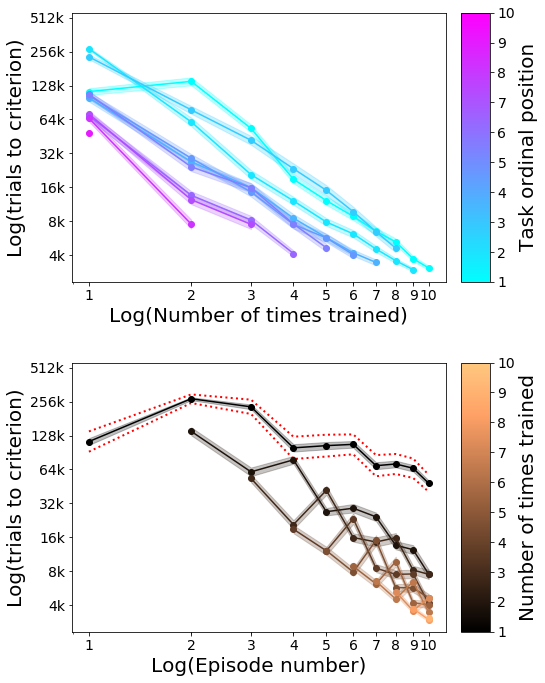

In [12]:
LOG_PLOT_YLIM = (7.75, 13.25)

plots.plot_processed_results_all_dimensions(control_updated_analyses, data_index=1, 
                                            title='',
                                            ylim=LOG_PLOT_YLIM, log_x=True, log_y=True, sem_n=(60, 60, 60, 180), shade_error=True,
                                            font_dict=FONT_DICT, times_trained_colormap=QUERY_ORDINAL_POSITION_COMORLAP, 
                                            tasks_trained_colormap=NUM_TIMES_TRAINED_COLORMAP,
                                            dimension_names=('',), dimension_indices=(3,),
                                            num_tasks_trained_highlight_first_time='highlight',
                                            title_font_dict=TITLE_FONT_DICT, save_path='workshop/control_examples_to_criterion.pdf')

## Accuracy after 22.5k trials

Figure:

\begin{figure}[!htb]
% \vspace{-0.225in}
\centering
\includegraphics[width=\linewidth]{ch-results/figures/workshop/control_22point5k_examples_accuracy.pdf}
\caption{ {\bf FIGURE TITLE.} FIGURE DESCRIPTION.}
\label{fig:results-workshop-control-22point5k-examples-accuracy}
% \vspace{-0.2in}
\end{figure}


 Wrapfigure:

\begin{wrapfigure}{r}{0.5\linewidth}
\vspace{-.3in}
\begin{spacing}{1.0}
\centering
\includegraphics[width=0.95\linewidth]{ch-results/figures/workshop/control_22point5k_examples_accuracy.pdf}
\caption{ {\bf FIGURE TITLE.} FIGURE DESCRIPTION.}
\label{fig:results-workshop-control-22point5k-examples-accuracy}
\end{spacing}
% \vspace{-.25in}
\end{wrapfigure}



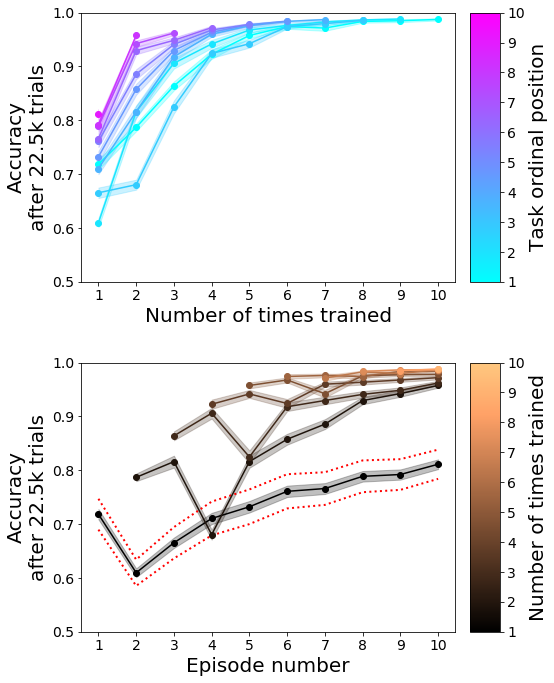

In [13]:
ACCURACY_PLOT_YLIM = (0.5, 1.0)

plots.plot_processed_results_all_dimensions(six_replications_updated_analyses, data_index=3, 
                                            title='', #'New episode, 22.5k accuracy, baseline model',
                                            sem_n=(60, 60, 60, 180), shade_error=True, ylim=ACCURACY_PLOT_YLIM, plot_y_label='Accuracy\nafter 22.5k trials',
                                            font_dict=FONT_DICT, times_trained_colormap=QUERY_ORDINAL_POSITION_COMORLAP, 
                                            tasks_trained_colormap=NUM_TIMES_TRAINED_COLORMAP,
                                            dimension_names=('',), dimension_indices=(3,),
                                            num_tasks_trained_highlight_first_time='highlight',
                                            title_font_dict=TITLE_FONT_DICT, save_path='workshop/control_22point5k_examples_accuracy.pdf')

## Comparison -- trials to criterion

Figure:

\begin{figure}[!htb]
% \vspace{-0.225in}
\centering
\includegraphics[width=\linewidth]{ch-results/figures/control_sequential/test_control_trials_comparison.pdf}
\caption{ {\bf FIGURE TITLE.} FIGURE DESCRIPTION.}
\label{fig:results-control-sequential-test-control-trials-comparison}
% \vspace{-0.2in}
\end{figure}


 Wrapfigure:

\begin{wrapfigure}{r}{0.5\linewidth}
\vspace{-.3in}
\begin{spacing}{1.0}
\centering
\includegraphics[width=0.95\linewidth]{ch-results/figures/control_sequential/test_control_trials_comparison.pdf}
\caption{ {\bf FIGURE TITLE.} FIGURE DESCRIPTION.}
\label{fig:results-control-sequential-test-control-trials-comparison}
\end{spacing}
% \vspace{-.25in}
\end{wrapfigure}



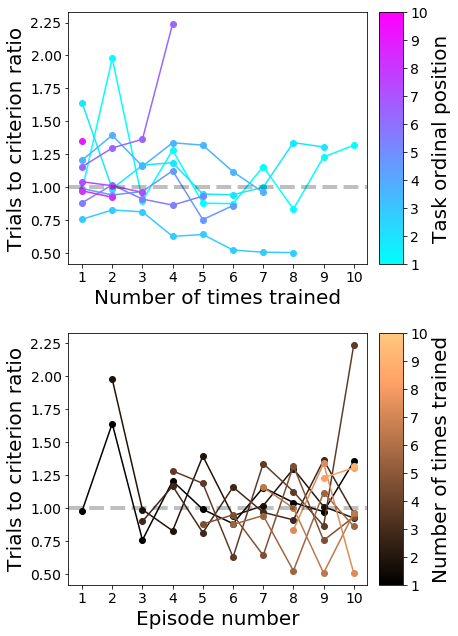

In [14]:
comparison_level = 0

plots.combined_comparison_plots(six_replications_updated_analyses, {1: control_updated_analyses}, '',
                                comparison_level, comparison_func=np.divide,
                                font_dict=FONT_DICT, comparison_first=True, ylim=None, data_index=0, 
                                log_x=False, log_y=False, shade_error=False, 
                                times_trained_colormap=QUERY_ORDINAL_POSITION_COMORLAP, 
                                tasks_trained_colormap=NUM_TIMES_TRAINED_COLORMAP,
                                plot_y_label='Trials to criterion ratio',
                                save_path='control_sequential/test_control_trials_comparison.pdf')

## Comparison -- accuracy after 22.5k trials

Figure:

\begin{figure}[!htb]
% \vspace{-0.225in}
\centering
\includegraphics[width=\linewidth]{ch-results/figures/workshop/test_control_accuracy_comparison.pdf}
\caption{ {\bf FIGURE TITLE.} FIGURE DESCRIPTION.}
\label{fig:results-workshop-test-control-accuracy-comparison}
% \vspace{-0.2in}
\end{figure}


 Wrapfigure:

\begin{wrapfigure}{r}{0.5\linewidth}
\vspace{-.3in}
\begin{spacing}{1.0}
\centering
\includegraphics[width=0.95\linewidth]{ch-results/figures/workshop/test_control_accuracy_comparison.pdf}
\caption{ {\bf FIGURE TITLE.} FIGURE DESCRIPTION.}
\label{fig:results-workshop-test-control-accuracy-comparison}
\end{spacing}
% \vspace{-.25in}
\end{wrapfigure}



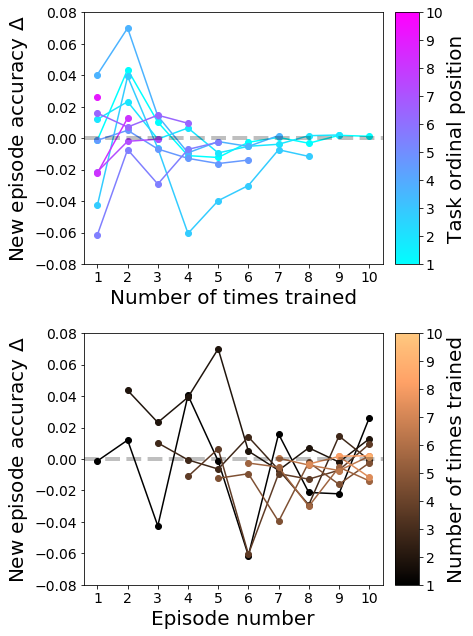

In [15]:
comparison_level = 0

ACCURACY_DIFFERNCE_YLIM = (-0.08, 0.08)

plots.combined_comparison_plots(six_replications_updated_analyses, {1: control_updated_analyses}, '',
                                comparison_level, comparison_func=np.subtract,
                                font_dict=FONT_DICT, comparison_first=False, 
                                ylim=ACCURACY_DIFFERNCE_YLIM, data_index=3, 
                                log_x=False, log_y=False, shade_error=False, 
                                times_trained_colormap=QUERY_ORDINAL_POSITION_COMORLAP,
                                tasks_trained_colormap=NUM_TIMES_TRAINED_COLORMAP,
                                plot_y_label='New episode accuracy $\\Delta$',
                                save_path='workshop/test_control_accuracy_comparison.pdf')

## Combined comparison plot

Figure:

\begin{figure}[!htb]
% \vspace{-0.225in}
\centering
\includegraphics[width=\linewidth]{ch-results/figures/workshop/control_combined_figure.pdf}
\caption{ {\bf FIGURE TITLE.} FIGURE DESCRIPTION.}
\label{fig:results-workshop-control-combined-figure}
% \vspace{-0.2in}
\end{figure}


 Wrapfigure:

\begin{wrapfigure}{r}{0.5\linewidth}
\vspace{-.3in}
\begin{spacing}{1.0}
\centering
\includegraphics[width=0.95\linewidth]{ch-results/figures/workshop/control_combined_figure.pdf}
\caption{ {\bf FIGURE TITLE.} FIGURE DESCRIPTION.}
\label{fig:results-workshop-control-combined-figure}
\end{spacing}
% \vspace{-.25in}
\end{wrapfigure}



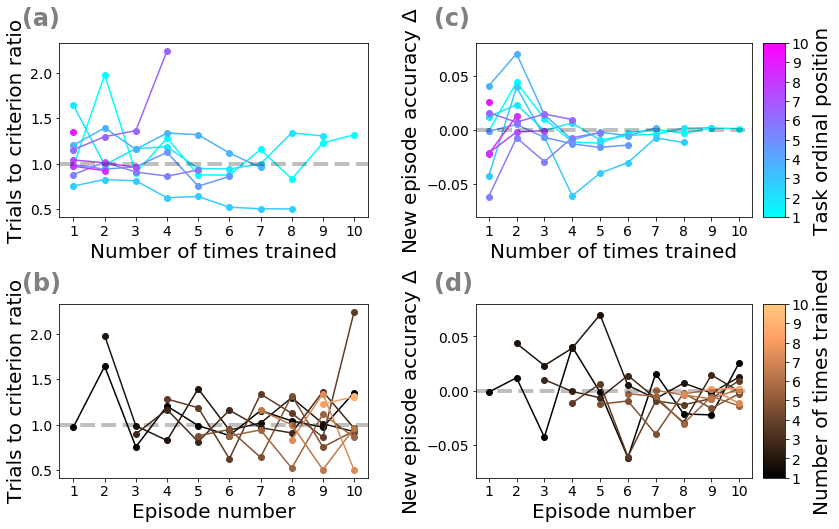

In [16]:
NROWS = 2
NCOLS = 2
COL_WIDTH = 6
ROW_HEIGHT = 4 
WIDTH_SPACING = 1
HEIGHT_SPACING = 0
    
figure = plt.figure(figsize=(NCOLS * COL_WIDTH + WIDTH_SPACING, NROWS * ROW_HEIGHT + HEIGHT_SPACING))
plt.subplots_adjust(hspace=0.5, wspace=0.35)


comparison_level = 0
examples_axes = (plt.subplot(NROWS, NCOLS, 1), plt.subplot(NROWS, NCOLS, NCOLS + 1))
plots.combined_comparison_plots(six_replications_updated_analyses, {1: control_updated_analyses}, '',
                                comparison_level, comparison_func=np.divide,
                                font_dict=FONT_DICT, comparison_first=True, ylim=None, data_index=0, 
                                log_x=False, log_y=False, shade_error=False, 
                                times_trained_colormap=QUERY_ORDINAL_POSITION_COMORLAP, 
                                tasks_trained_colormap=NUM_TIMES_TRAINED_COLORMAP,
                                plot_y_label='Trials to criterion ratio', add_colorbars=False,
                                external_axes=examples_axes)

ACCURACY_DIFFERNCE_YLIM = (-0.08, 0.08)
accuracy_axes = (plt.subplot(NROWS, NCOLS, 2), plt.subplot(NROWS, NCOLS, NCOLS + 2))
plots.combined_comparison_plots(six_replications_updated_analyses, {1: control_updated_analyses}, '',
                                comparison_level, comparison_func=np.subtract,
                                font_dict=FONT_DICT, comparison_first=False, 
                                ylim=ACCURACY_DIFFERNCE_YLIM, data_index=3, 
                                log_x=False, log_y=False, shade_error=False, 
                                times_trained_colormap=QUERY_ORDINAL_POSITION_COMORLAP,
                                tasks_trained_colormap=NUM_TIMES_TRAINED_COLORMAP,
                                plot_y_label='New episode accuracy $\\Delta$',
                                external_axes=accuracy_axes)



CONTROL_TEXT_POSITIONS = [(0.085, 0.91), (0.085, 0.45), 
                          (0.525, 0.91), (0.525, 0.45)]

subfigure_text_font_dict = FONT_DICT.copy()
subfigure_text_font_dict['fontsize'] += 4
subfigure_text_font_dict['color'] = '#808080'
subfigure_text_font_dict['weight'] = 'bold'

num_subfigures = 4
for i in range(num_subfigures):
    pos = CONTROL_TEXT_POSITIONS[i]
    plt.text(pos[0], pos[1], f'({chr(97 + i)})', 
             subfigure_text_font_dict, transform=figure.transFigure)


plots.save('workshop/control_combined_figure.pdf')
plt.show()

-----

# Appendix - task-modulated results

## Comparison -- trials to criterion

Figure:

\begin{figure}[!htb]
% \vspace{-0.225in}
\centering
\includegraphics[width=\linewidth]{ch-results/figures/workshop/modulated_examples_to_criterion_comparison.pdf}
\caption{ {\bf FIGURE TITLE.} FIGURE DESCRIPTION.}
\label{fig:results-workshop-modulated-examples-to-criterion-comparison}
% \vspace{-0.2in}
\end{figure}


 Wrapfigure:

\begin{wrapfigure}{r}{0.5\linewidth}
\vspace{-.3in}
\begin{spacing}{1.0}
\centering
\includegraphics[width=0.95\linewidth]{ch-results/figures/workshop/modulated_examples_to_criterion_comparison.pdf}
\caption{ {\bf FIGURE TITLE.} FIGURE DESCRIPTION.}
\label{fig:results-workshop-modulated-examples-to-criterion-comparison}
\end{spacing}
% \vspace{-.25in}
\end{wrapfigure}



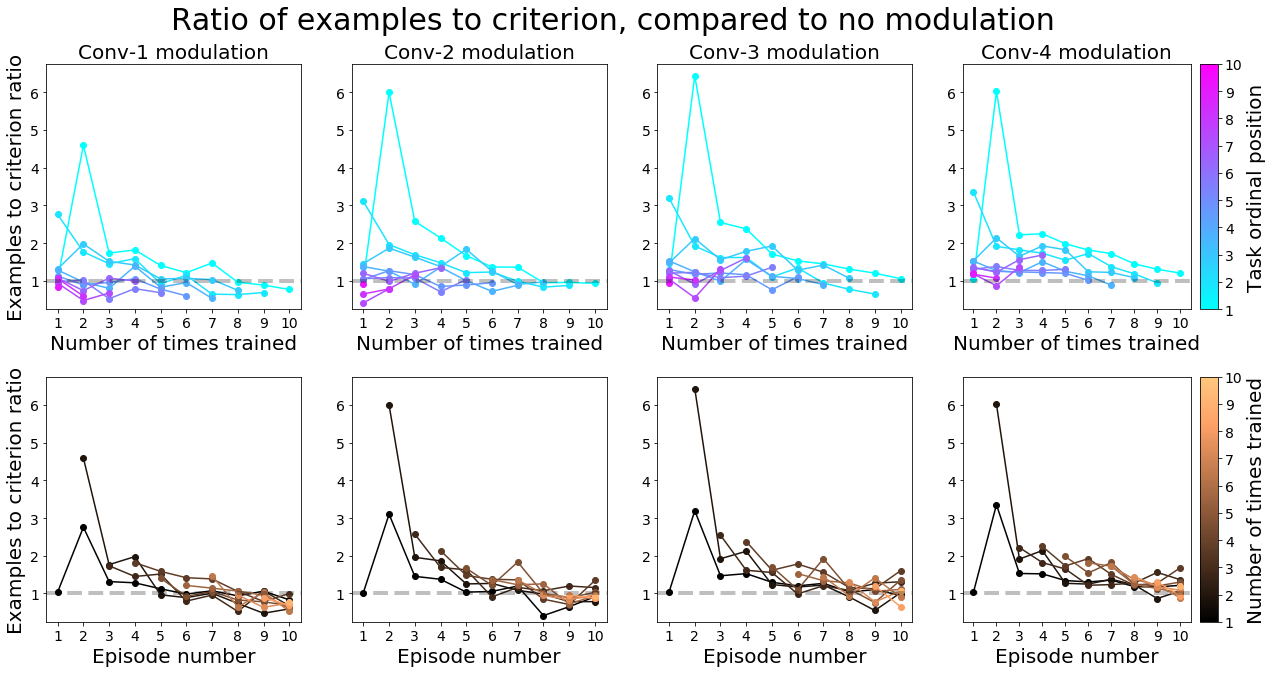

In [17]:
comparison_level = 0

EXAMPLE_RATIO_YLIM = (0.25, 6.75)

plots.combined_comparison_plots(six_replications_updated_analyses, query_mod_updated_analyses, 
                                'Ratio of examples to criterion, compared to no modulation',
                                comparison_level, comparison_func=np.divide,
                                font_dict=FONT_DICT, comparison_first=True, ylim=EXAMPLE_RATIO_YLIM, data_index=0, 
                                log_x=False, log_y=False, shade_error=False, 
                                times_trained_colormap=QUERY_ORDINAL_POSITION_COMORLAP, 
                                tasks_trained_colormap=NUM_TIMES_TRAINED_COLORMAP,
                                plot_y_label='Examples to criterion ratio',
                                save_path='workshop/modulated_examples_to_criterion_comparison.pdf')

## Comparison -- accuracy after 22.5k trials

Figure:

\begin{figure}[!htb]
% \vspace{-0.225in}
\centering
\includegraphics[width=\linewidth]{ch-results/figures/workshop/modulated_accuracy_comparison.pdf}
\caption{ {\bf FIGURE TITLE.} FIGURE DESCRIPTION.}
\label{fig:results-workshop-modulated-accuracy-comparison}
% \vspace{-0.2in}
\end{figure}


 Wrapfigure:

\begin{wrapfigure}{r}{0.5\linewidth}
\vspace{-.3in}
\begin{spacing}{1.0}
\centering
\includegraphics[width=0.95\linewidth]{ch-results/figures/workshop/modulated_accuracy_comparison.pdf}
\caption{ {\bf FIGURE TITLE.} FIGURE DESCRIPTION.}
\label{fig:results-workshop-modulated-accuracy-comparison}
\end{spacing}
% \vspace{-.25in}
\end{wrapfigure}



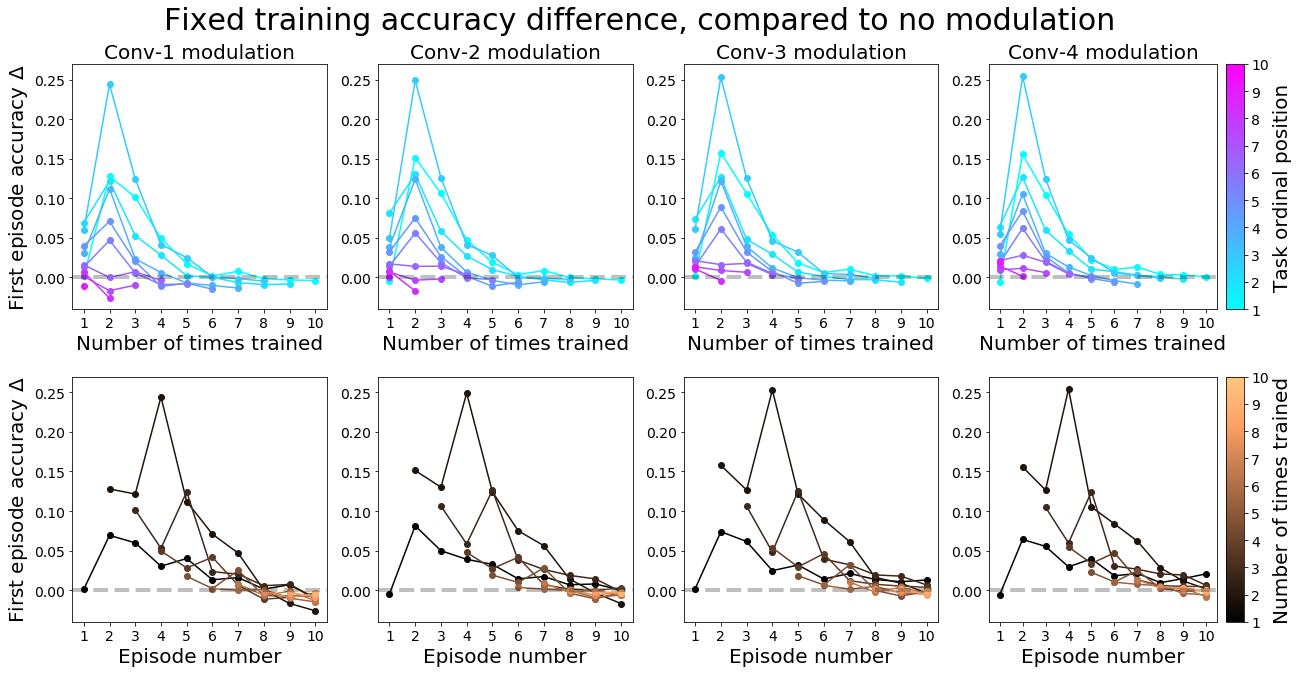

In [18]:
comparison_level = 0

ACCURACY_DIFFERNCE_YLIM = (-0.04, 0.27)

plots.combined_comparison_plots(six_replications_updated_analyses, query_mod_updated_analyses, 
                                'Fixed training accuracy difference, compared to no modulation',
                                comparison_level, comparison_func=np.subtract,
                                font_dict=FONT_DICT, comparison_first=False, ylim=ACCURACY_DIFFERNCE_YLIM, data_index=3, 
                                log_x=False, log_y=False, shade_error=False, 
                                times_trained_colormap=QUERY_ORDINAL_POSITION_COMORLAP, 
                                tasks_trained_colormap=NUM_TIMES_TRAINED_COLORMAP,
                                plot_y_label='First episode accuracy $\\Delta$',
                                save_path='workshop/modulated_accuracy_comparison.pdf')

-----

# Starting to think about the compact comparison plots

log(y) = -1.6 log(x) + 11.7
log(y) = -1.8 log(x) + 13.2


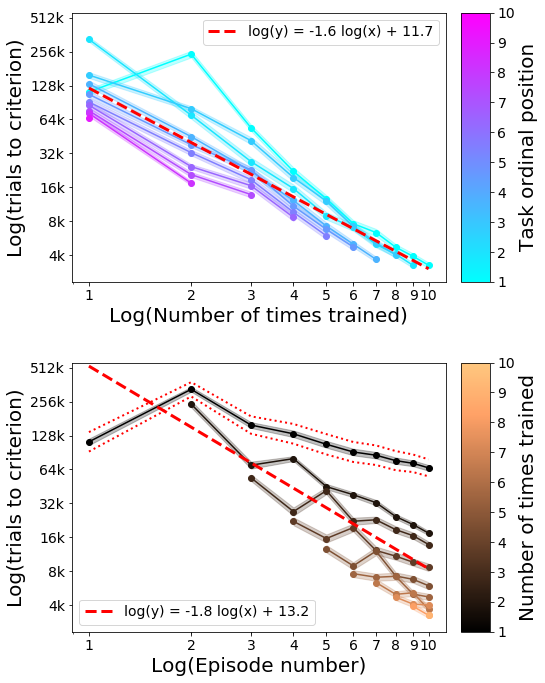

In [53]:
LOG_PLOT_YLIM = (7.75, 13.25)

plots.plot_processed_results_all_dimensions(six_replications_updated_analyses, data_index=1, 
                                            title='',
                                            ylim=LOG_PLOT_YLIM, log_x=True, log_y=True, sem_n=(60, 60, 60, 180), shade_error=True,
                                            font_dict=FONT_DICT, times_trained_colormap=QUERY_ORDINAL_POSITION_COMORLAP, 
                                            tasks_trained_colormap=NUM_TIMES_TRAINED_COLORMAP,
                                            dimension_names=('',), dimension_indices=(3,),
                                            num_tasks_trained_highlight_first_time='highlight',
                                            title_font_dict=TITLE_FONT_DICT, # save_path='workshop/examples_to_criterion.pdf',
                                            plot_regression=True, regression_legend=True)

## Task-modulation comparison

log(y) = -1.6 log(x) + 11.7
log(y) = -1.8 log(x) + 13.2
log(y) = -1.48 log(x) + 11.3
log(y) = -1.34 log(x) + 12.1
log(y) = -1.47 log(x) + 11.2
log(y) = -1.34 log(x) + 12.0
log(y) = -1.47 log(x) + 11.2
log(y) = -1.38 log(x) + 12.0
log(y) = -1.49 log(x) + 11.2
log(y) = -1.4 log(x) + 12.1
Figure:

\begin{figure}[!htb]
% \vspace{-0.225in}
\centering
\includegraphics[width=\linewidth]{ch-results/figures/workshop/combined_by_modulation_level_with_regression.pdf}
\caption{ {\bf FIGURE TITLE.} FIGURE DESCRIPTION.}
\label{fig:results-workshop-combined-by-modulation-level-with-regression}
% \vspace{-0.2in}
\end{figure}


 Wrapfigure:

\begin{wrapfigure}{r}{0.5\linewidth}
\vspace{-.3in}
\begin{spacing}{1.0}
\centering
\includegraphics[width=0.95\linewidth]{ch-results/figures/workshop/combined_by_modulation_level_with_regression.pdf}
\caption{ {\bf FIGURE TITLE.} FIGURE DESCRIPTION.}
\label{fig:results-workshop-combined-by-modulation-level-with-regression}
\end{spacing}
% \vspace{-.25in}
\end{wrap

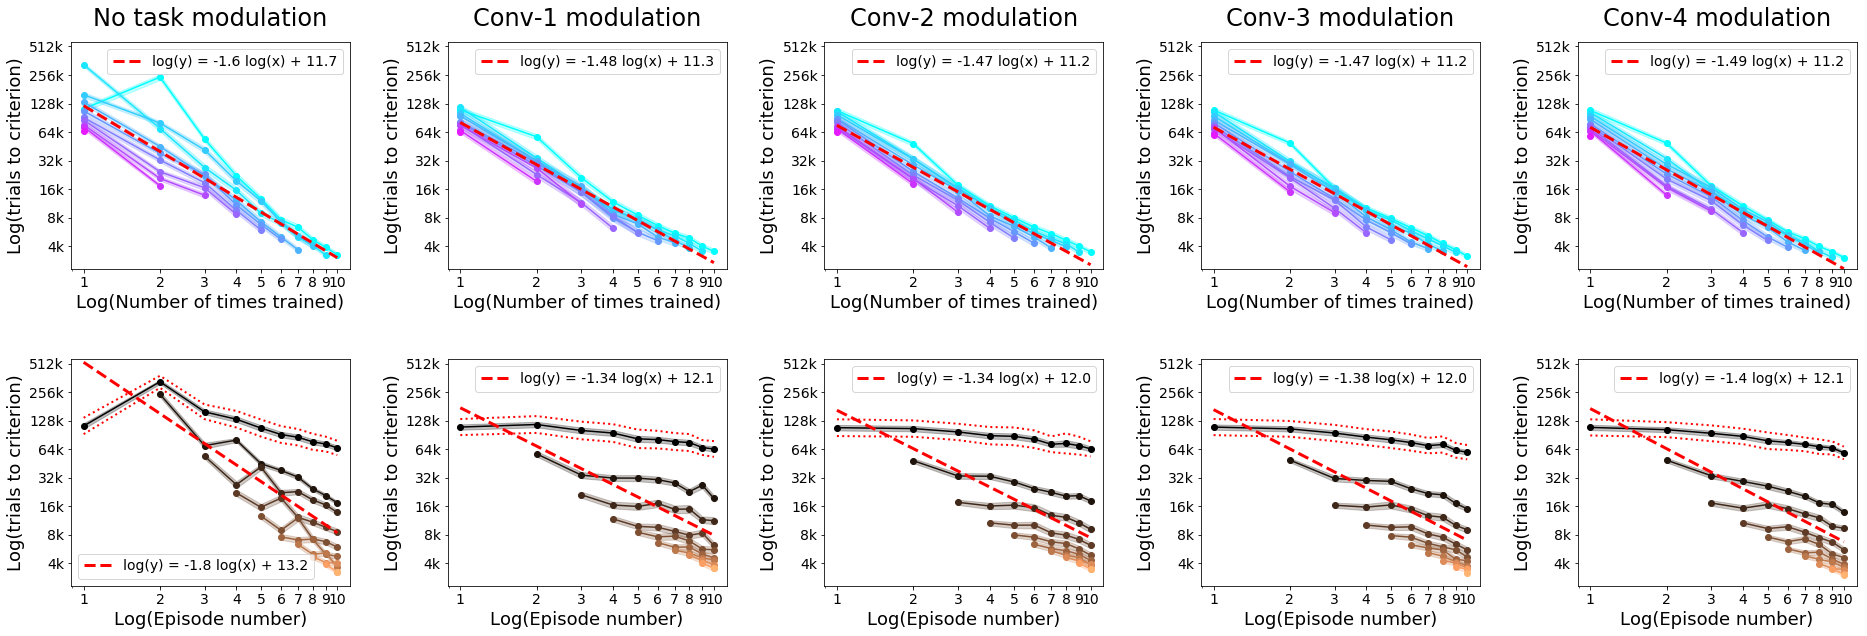

In [61]:
NROWS = 2
NCOLS = 5
COL_WIDTH = 6
ROW_HEIGHT = 5 
WIDTH_SPACING = 2
HEIGHT_SPACING = 0

title_font_dict = TITLE_FONT_DICT.copy()
title_font_dict['pad'] = 16

multi_plot_font_dict = FONT_DICT.copy()
multi_plot_font_dict['fontsize'] = 18
    
figure = plt.figure(figsize=(NCOLS * COL_WIDTH + WIDTH_SPACING, NROWS * ROW_HEIGHT + HEIGHT_SPACING))
plt.subplots_adjust(hspace=0.4, wspace=0.35)

LOG_PLOT_YLIM = (7.75, 13.25)

axes = (plt.subplot(NROWS, NCOLS, 1), plt.subplot(NROWS, NCOLS, NCOLS + 1))
plots.plot_processed_results_all_dimensions(six_replications_analyses, data_index=1, 
                                            title='',
                                            ylim=LOG_PLOT_YLIM, log_x=True, log_y=True, sem_n=(60, 60, 60, 180), shade_error=True,
                                            font_dict=multi_plot_font_dict, times_trained_colormap=QUERY_ORDINAL_POSITION_COMORLAP, 
                                            tasks_trained_colormap=NUM_TIMES_TRAINED_COLORMAP,
                                            dimension_names=('',), dimension_indices=(3,),
                                            num_tasks_trained_highlight_first_time='highlight', add_colorbars=False,
                                            title_font_dict=title_font_dict, external_axes=axes,
                                            num_times_trained_title='No task modulation',
                                            plot_regression=True, regression_legend=True)

for mod_level in sorted(query_mod_updated_analyses.keys()):
    axes = (plt.subplot(NROWS, NCOLS, 1 + mod_level), plt.subplot(NROWS, NCOLS, NCOLS + 1 + mod_level))
    plots.plot_processed_results_all_dimensions(query_mod_updated_analyses[mod_level], data_index=1, 
                                                title='',
                                                ylim=LOG_PLOT_YLIM, log_x=True, log_y=True, sem_n=(60, 60, 60, 180), shade_error=True,
                                                font_dict=multi_plot_font_dict, times_trained_colormap=QUERY_ORDINAL_POSITION_COMORLAP, 
                                                tasks_trained_colormap=NUM_TIMES_TRAINED_COLORMAP,
                                                dimension_names=('',), dimension_indices=(3,),
                                                num_tasks_trained_highlight_first_time='highlight', add_colorbars=False,
                                                title_font_dict=title_font_dict, external_axes=axes,
                                                num_times_trained_title=f'Conv-{mod_level} modulation',
                                                plot_regression=True, regression_legend=True)

# TEXT_POSITIONS = [(0.06, 0.85), (0.06, 0.42),
#                   (0.3365, 0.85), (0.3365, 0.42),
#                   (0.625, 0.85), (0.625, 0.42)]

# subfigure_text_font_dict = FONT_DICT.copy()
# subfigure_text_font_dict['fontsize'] += 4
# subfigure_text_font_dict['color'] = '#808080'
# subfigure_text_font_dict['weight'] = 'bold'

# num_subfigures = 6
# for i in range(num_subfigures):
#     pos = TEXT_POSITIONS[i]
#     plt.text(pos[0], pos[1], f'({chr(97 + i)})', 
#              subfigure_text_font_dict, transform=figure.transFigure)


plots.save('workshop/combined_by_modulation_level_with_regression.pdf')
plt.show()

## Heterogeneous dimensions comparison

log(y) = -1.6 log(x) + 11.7
log(y) = -1.8 log(x) + 13.2
log(y) = -1.53 log(x) + 11.5
log(y) = -1.88 log(x) + 13.2
Figure:

\begin{figure}[!htb]
% \vspace{-0.225in}
\centering
\includegraphics[width=\linewidth]{ch-results/figures/workshop/control_plot_with_regression.pdf}
\caption{ {\bf FIGURE TITLE.} FIGURE DESCRIPTION.}
\label{fig:results-workshop-control-plot-with-regression}
% \vspace{-0.2in}
\end{figure}


 Wrapfigure:

\begin{wrapfigure}{r}{0.5\linewidth}
\vspace{-.3in}
\begin{spacing}{1.0}
\centering
\includegraphics[width=0.95\linewidth]{ch-results/figures/workshop/control_plot_with_regression.pdf}
\caption{ {\bf FIGURE TITLE.} FIGURE DESCRIPTION.}
\label{fig:results-workshop-control-plot-with-regression}
\end{spacing}
% \vspace{-.25in}
\end{wrapfigure}



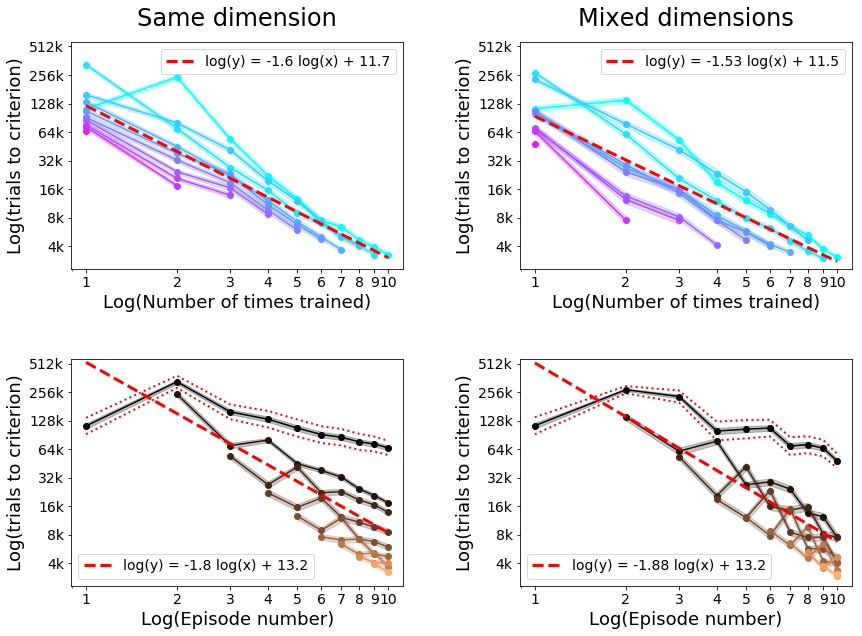

In [60]:
NROWS = 2
NCOLS = 2
COL_WIDTH = 6
ROW_HEIGHT = 5 
WIDTH_SPACING = 2
HEIGHT_SPACING = 0

title_font_dict = TITLE_FONT_DICT.copy()
title_font_dict['pad'] = 16

multi_plot_font_dict = FONT_DICT.copy()
multi_plot_font_dict['fontsize'] = 18
    
figure = plt.figure(figsize=(NCOLS * COL_WIDTH + WIDTH_SPACING, NROWS * ROW_HEIGHT + HEIGHT_SPACING))
plt.subplots_adjust(hspace=0.4, wspace=0.35)

LOG_PLOT_YLIM = (7.75, 13.25)

axes = (plt.subplot(NROWS, NCOLS, 1), plt.subplot(NROWS, NCOLS, NCOLS + 1))
plots.plot_processed_results_all_dimensions(six_replications_analyses, data_index=1, 
                                            title='',
                                            ylim=LOG_PLOT_YLIM, log_x=True, log_y=True, sem_n=(60, 60, 60, 180), shade_error=True,
                                            font_dict=multi_plot_font_dict, times_trained_colormap=QUERY_ORDINAL_POSITION_COMORLAP, 
                                            tasks_trained_colormap=NUM_TIMES_TRAINED_COLORMAP,
                                            dimension_names=('',), dimension_indices=(3,),
                                            num_tasks_trained_highlight_first_time='highlight', add_colorbars=False,
                                            title_font_dict=title_font_dict, external_axes=axes,
                                            num_times_trained_title='Same dimension',
                                            plot_regression=True, regression_legend=True)


axes = (plt.subplot(NROWS, NCOLS, 2), plt.subplot(NROWS, NCOLS, NCOLS + 2))
plots.plot_processed_results_all_dimensions(control_updated_analyses, data_index=1, 
                                            title='',
                                            ylim=LOG_PLOT_YLIM, log_x=True, log_y=True, sem_n=(60, 60, 60, 180), shade_error=True,
                                            font_dict=multi_plot_font_dict, times_trained_colormap=QUERY_ORDINAL_POSITION_COMORLAP, 
                                            tasks_trained_colormap=NUM_TIMES_TRAINED_COLORMAP,
                                            dimension_names=('',), dimension_indices=(3,),
                                            num_tasks_trained_highlight_first_time='highlight', add_colorbars=False,
                                            title_font_dict=title_font_dict, external_axes=axes,
                                            num_times_trained_title='Mixed dimensions',
                                            plot_regression=True, regression_legend=True)



# TEXT_POSITIONS = [(0.06, 0.85), (0.06, 0.42),
#                   (0.3365, 0.85), (0.3365, 0.42),
#                   (0.625, 0.85), (0.625, 0.42)]

# subfigure_text_font_dict = FONT_DICT.copy()
# subfigure_text_font_dict['fontsize'] += 4
# subfigure_text_font_dict['color'] = '#808080'
# subfigure_text_font_dict['weight'] = 'bold'

# num_subfigures = 6
# for i in range(num_subfigures):
#     pos = TEXT_POSITIONS[i]
#     plt.text(pos[0], pos[1], f'({chr(97 + i)})', 
#              subfigure_text_font_dict, transform=figure.transFigure)


plots.save('workshop/control_plot_with_regression.pdf')
plt.show()